In [1]:
import sys
sys.path.append("Modules")

from loop import *

INO=Arduino('COM3')
HP=HP4155('GPIB0::17', debug=False)

In [2]:
ChnSelect = [True, False, False, False, False, False]
ChnPrefix=['TP6', '', '', '', '','']
ptype= [True, True, True, True, True, True]

In [3]:
for i in range(0):
    clear_output(wait=True)

    progress="Waiting"

    print(f"Measurement: {i+1}")
    start=datetime.datetime.now().strftime("%y%m%d %H-%M")
    
    for n, Chn in enumerate(ChnSelect):
        clear_output(wait=True)
        print(f"Chn{n+1} measure: {Chn}")
        if Chn:
            printf(f"Measuring {ChnPrefix[n]}, ptype: {ptype[n]}       {datetime.datetime.now().strftime('%y/%m/%d %H:%M:%S')}", start, True)
            INO.opench(n+1)
            loop(HP, ChnPrefix[n], ptype[n], start)
            printf('', start, True)
    
    now=datetime.datetime.now().strftime("%y/%m/%d %H:%M:%S")

Chn1 measure: True
Measuring TP6, ptype: True       23/12/02 14:32:00
Open INO: ch1
Set IdxVgs
 Vg=(0, -1.5, -0.01), Vd=-0.025, Ilim=0.0015


'Start+'

.

C:\Users\Zucchi\Jupyter\HPIB\Modules\HPIB_plot.py:179: RuntimeWarning: invalid value encountered in divide
  gm=(np.diff(getpd(df,'ID').T)/np.diff(getpd(df,'VG').T)).T
C:\Users\Zucchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Zucchi\Jupyter\HPIB\Modules\HPIB_plot.py:209: RankWarning: Polyfit may be poorly conditioned
  m, b= np.polyfit(VGfit, IDfit, 1)
C:\Users\Zucchi\Jupyter\HPIB\Modules\HPIB_plot.py:210: RuntimeWarning: divide by zero encountered in scalar divide
  Vth=-b/m


IndexError: list index out of range

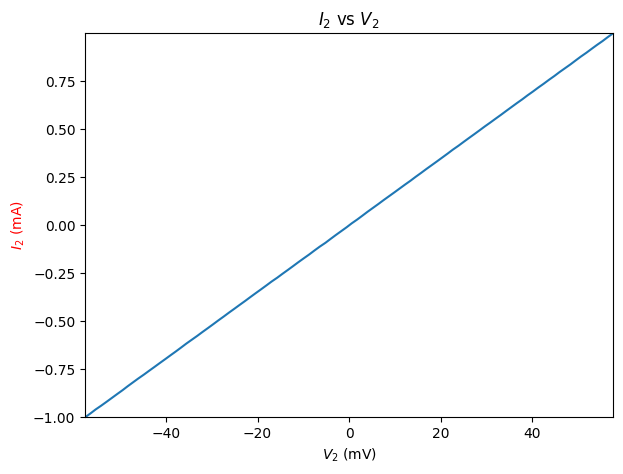

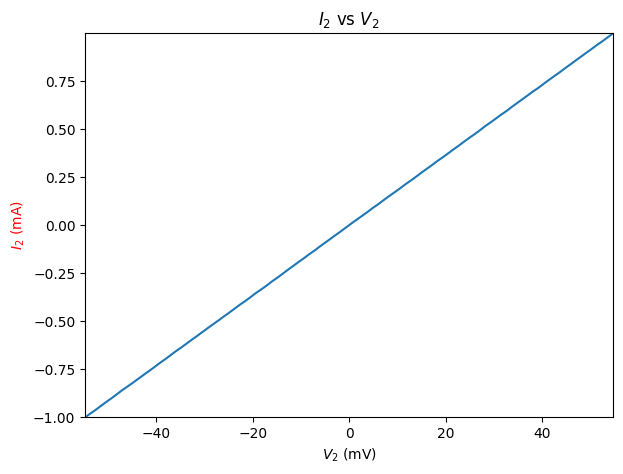

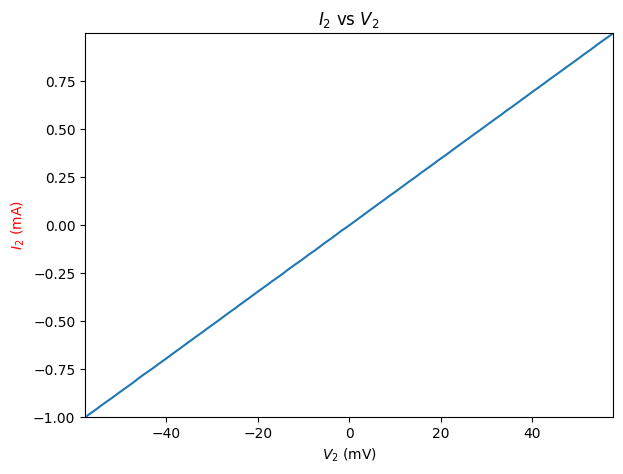

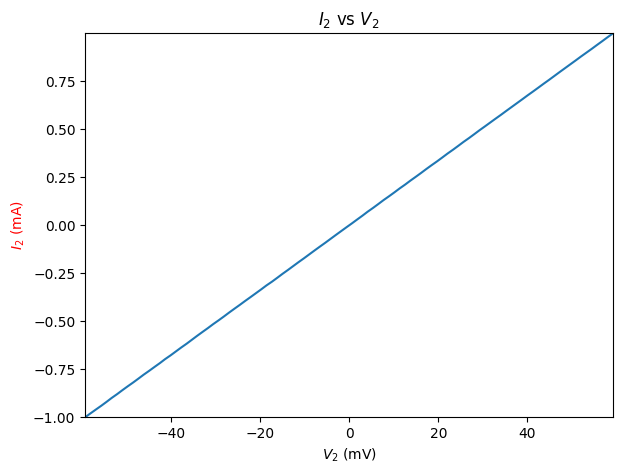

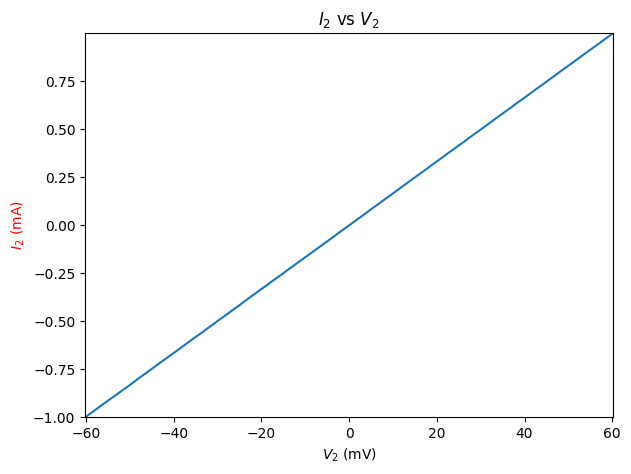

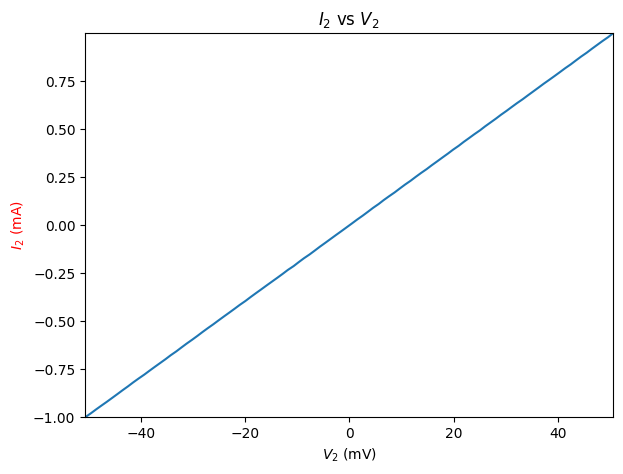

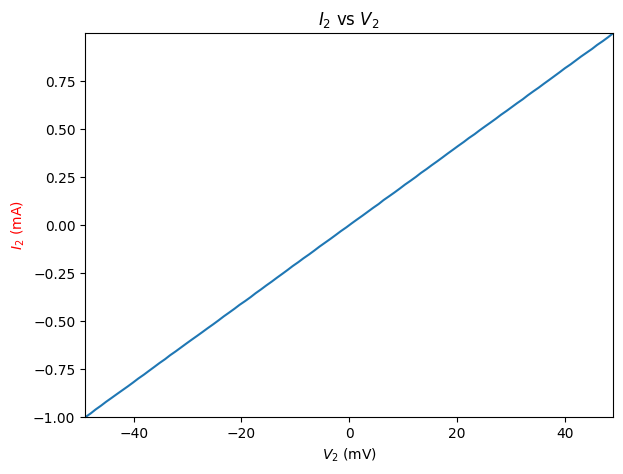

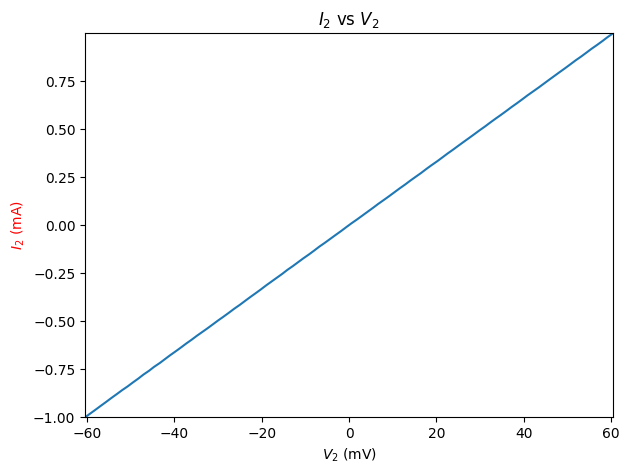

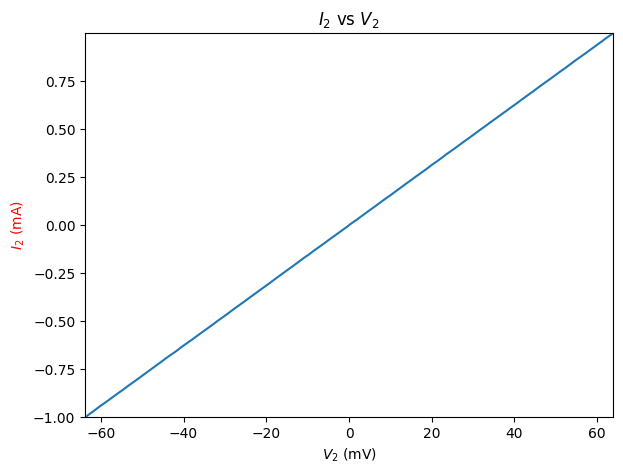

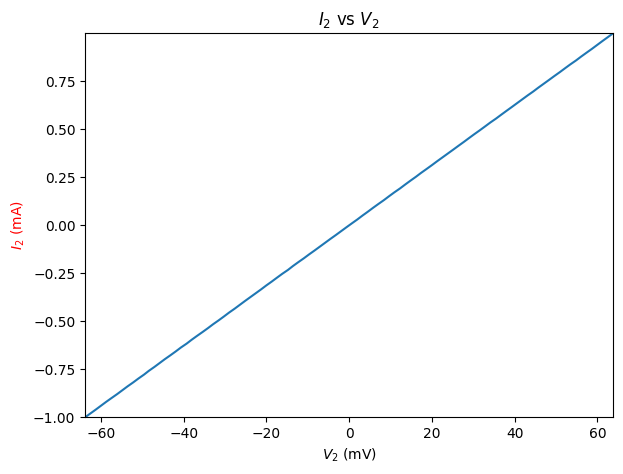

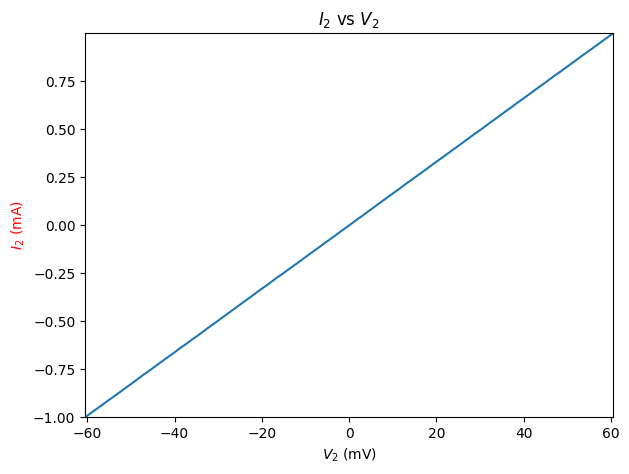

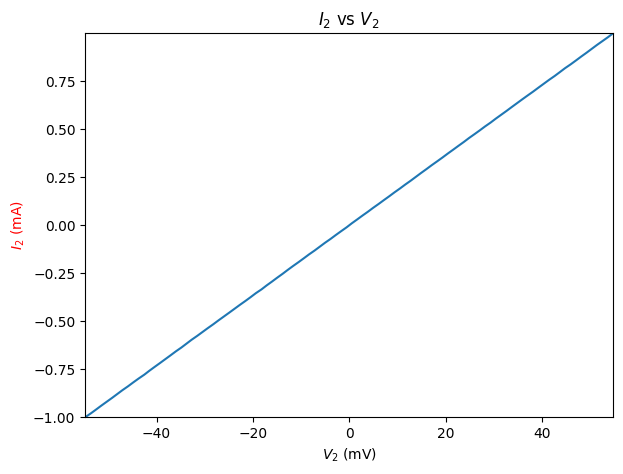

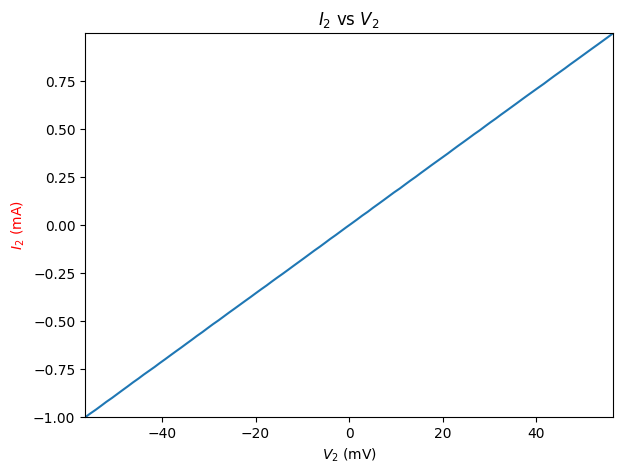

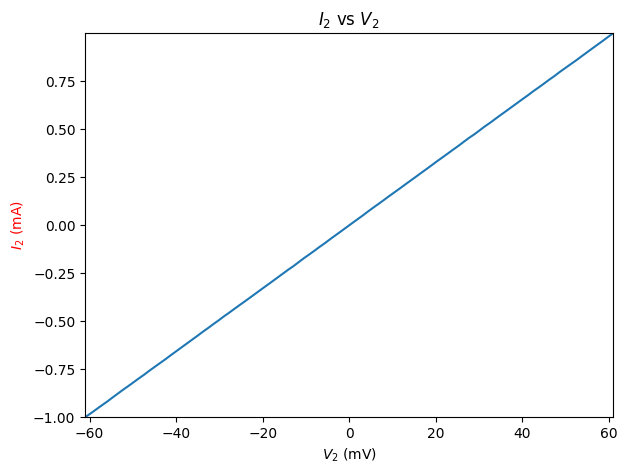

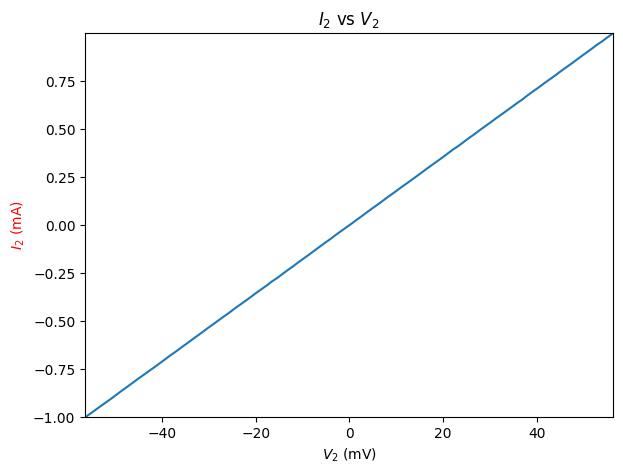

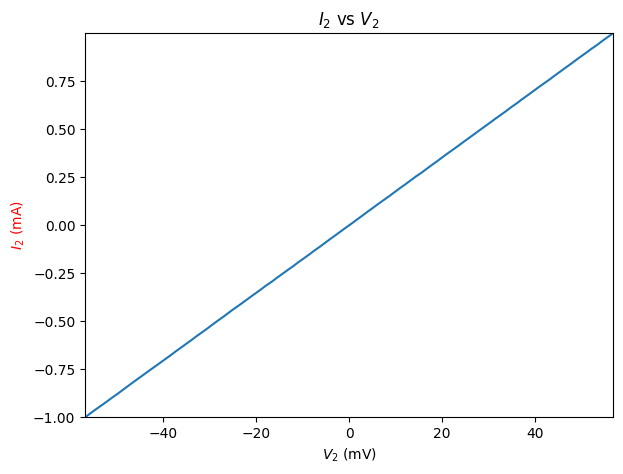

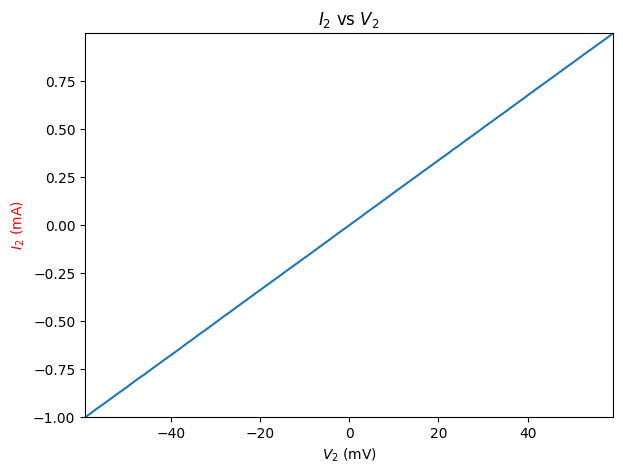

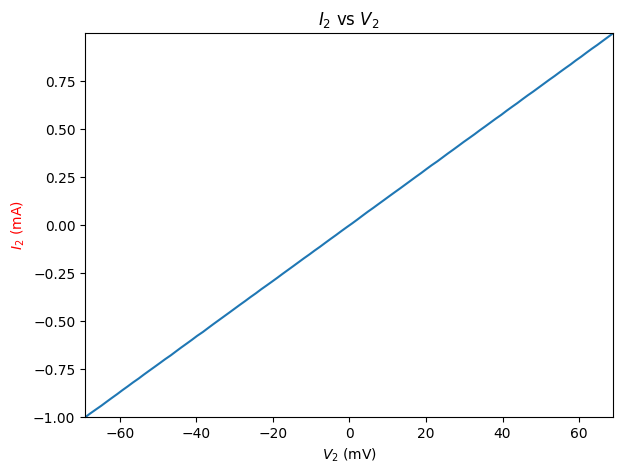

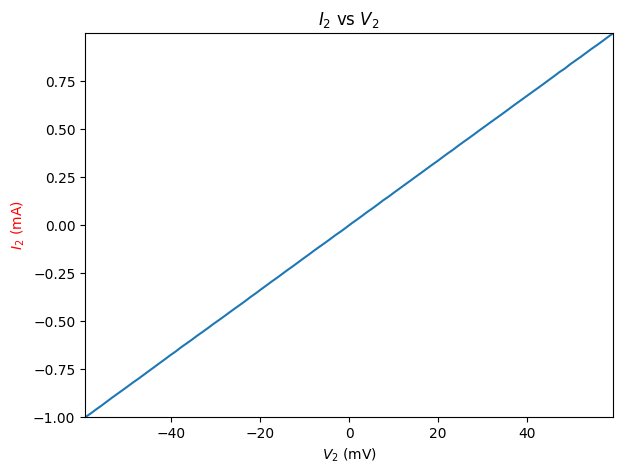

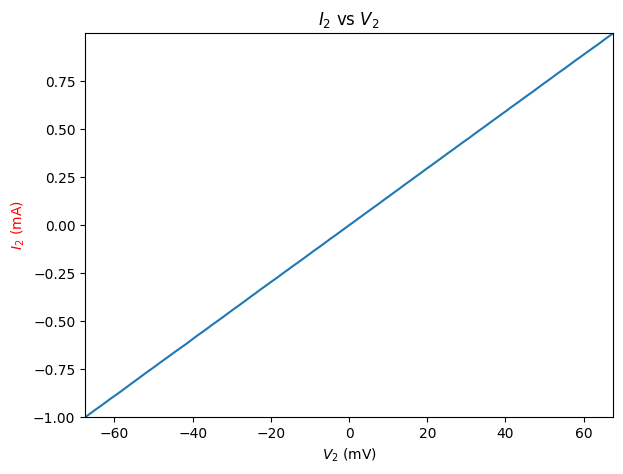

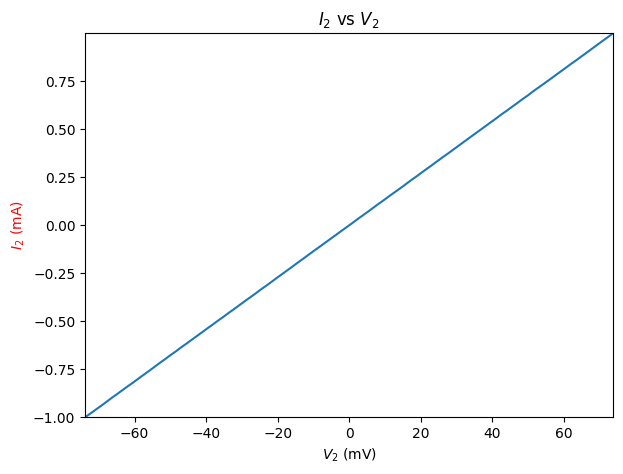

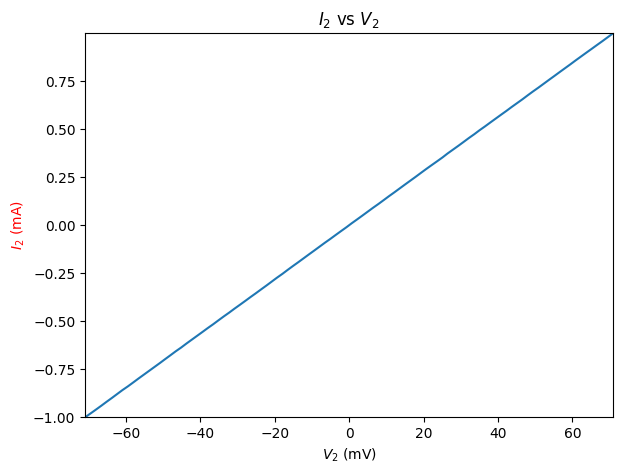

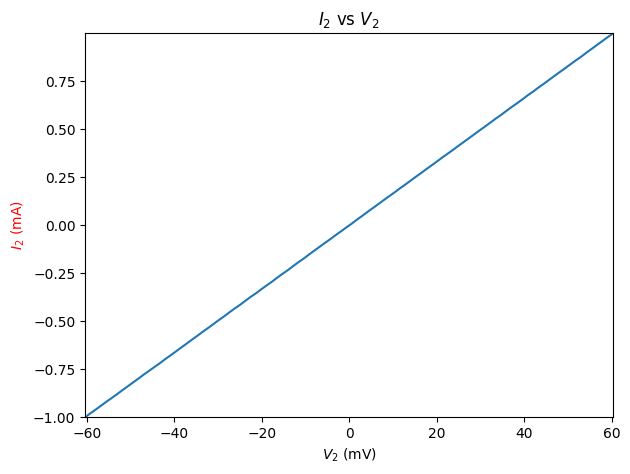

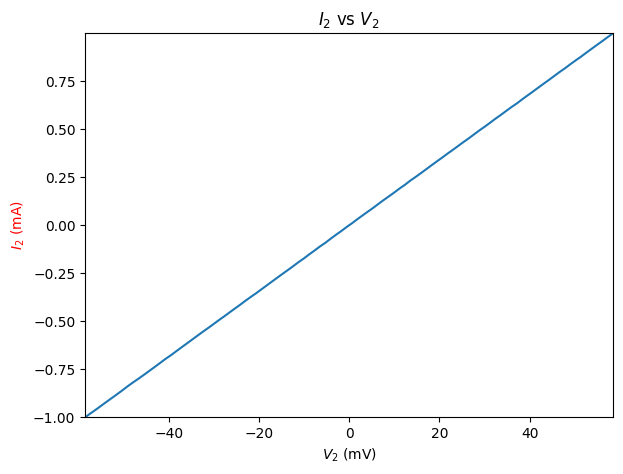

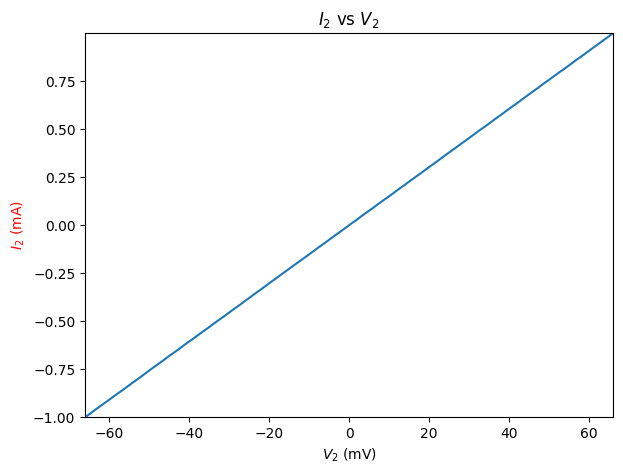

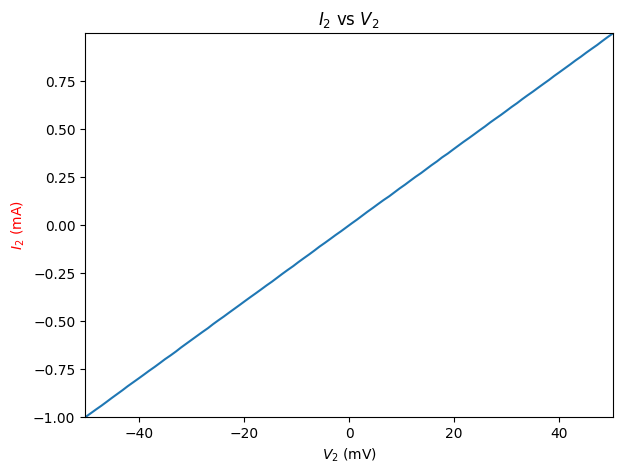

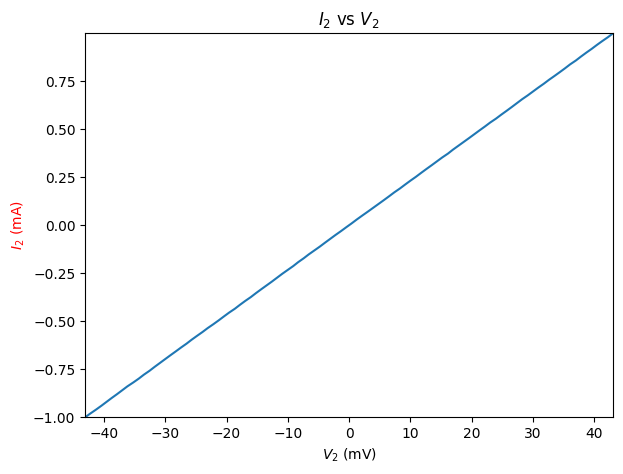

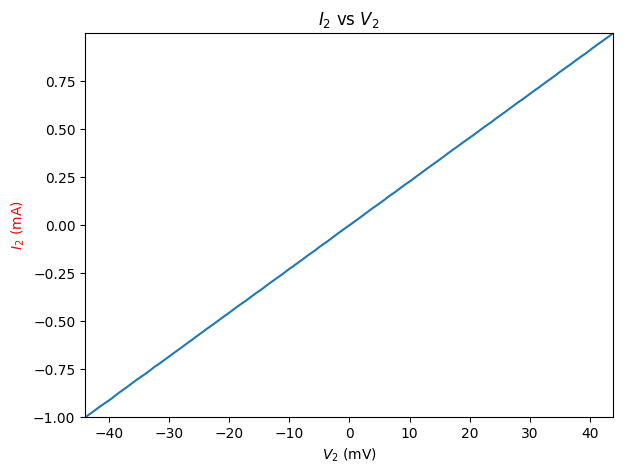

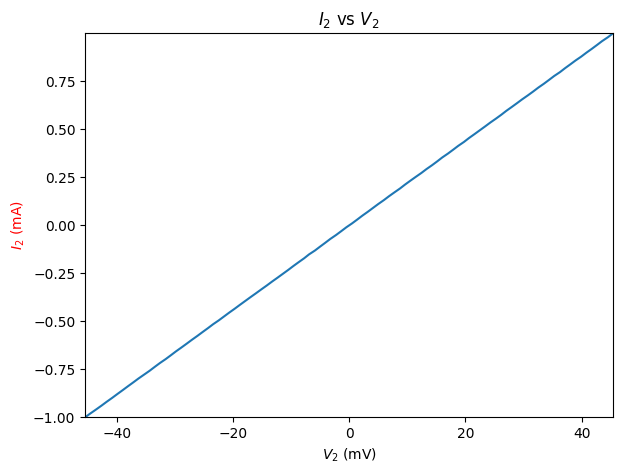

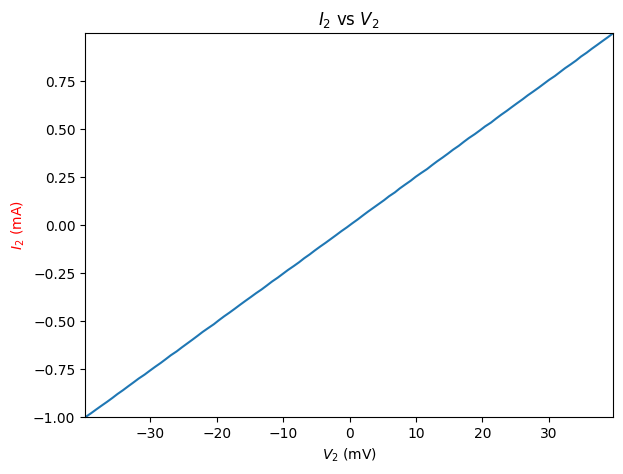

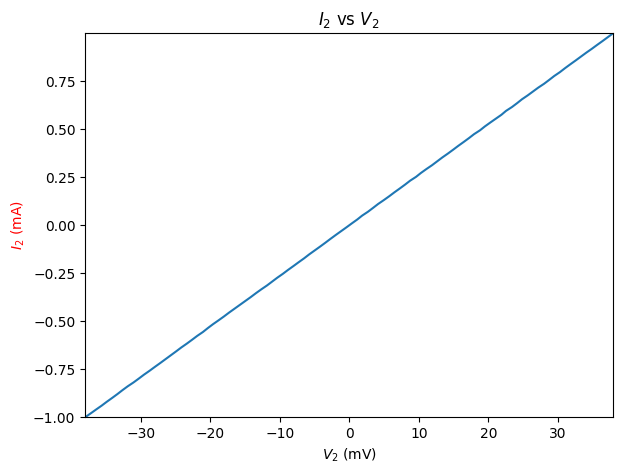

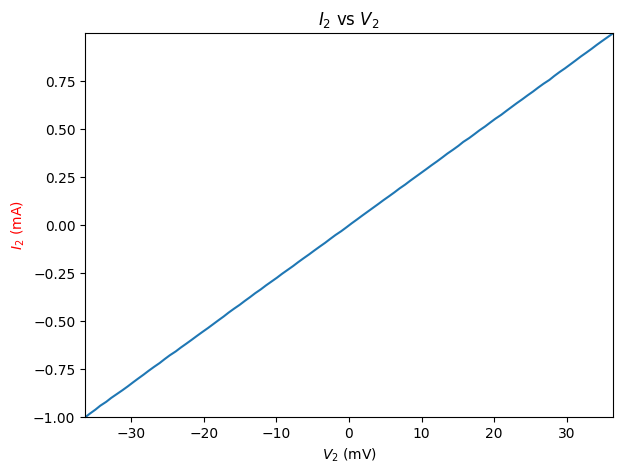

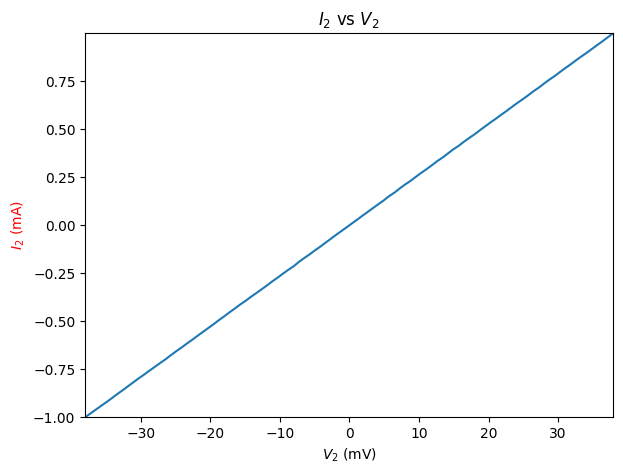

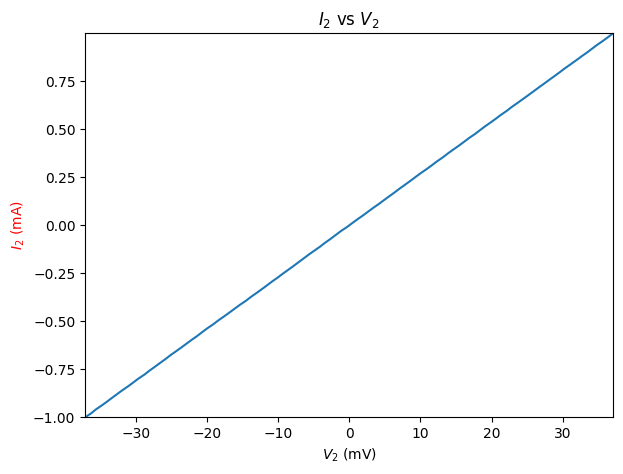

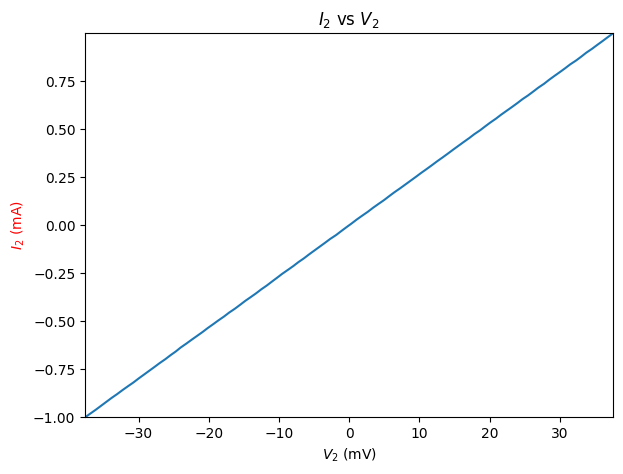

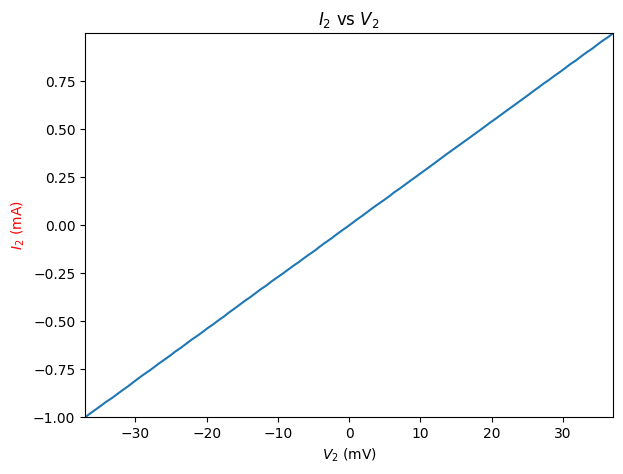

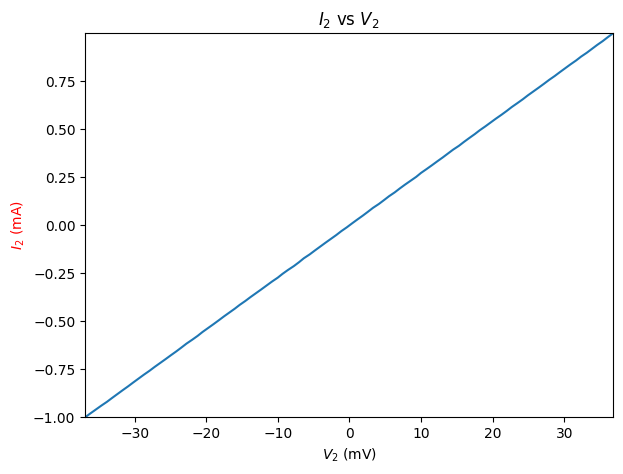

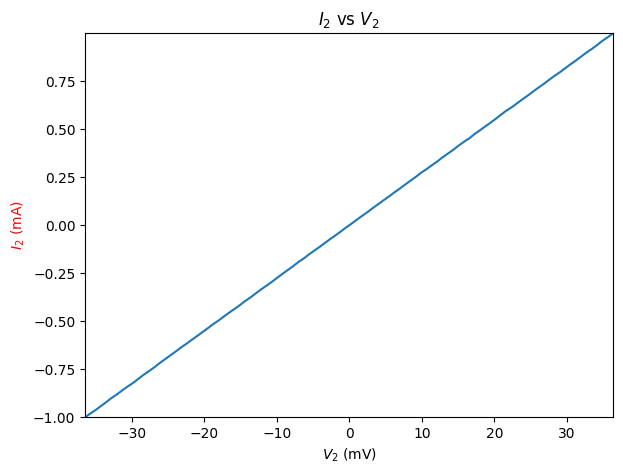

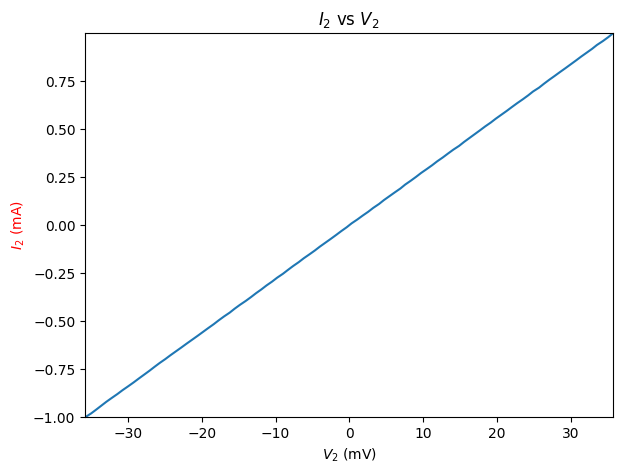

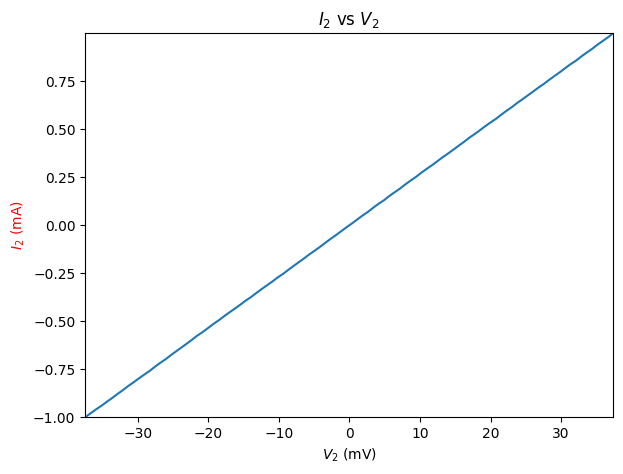

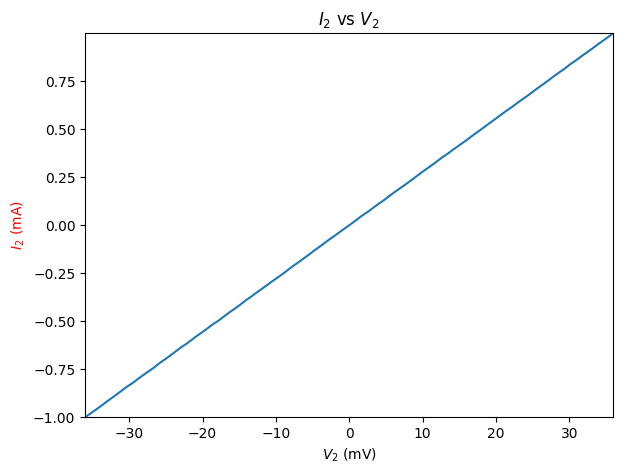

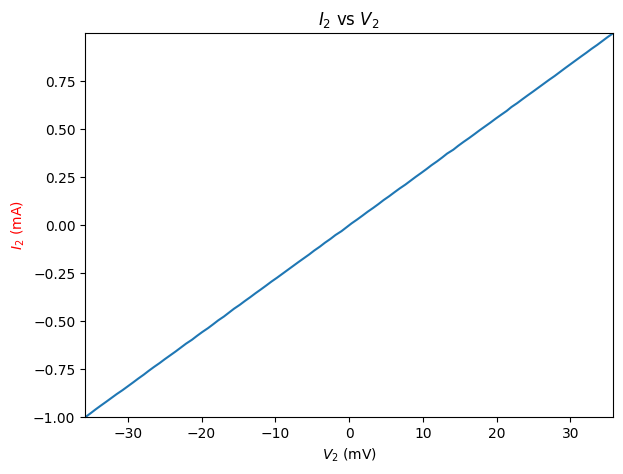

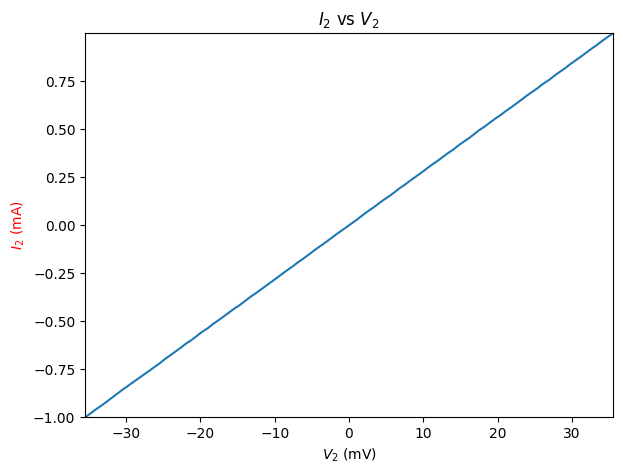

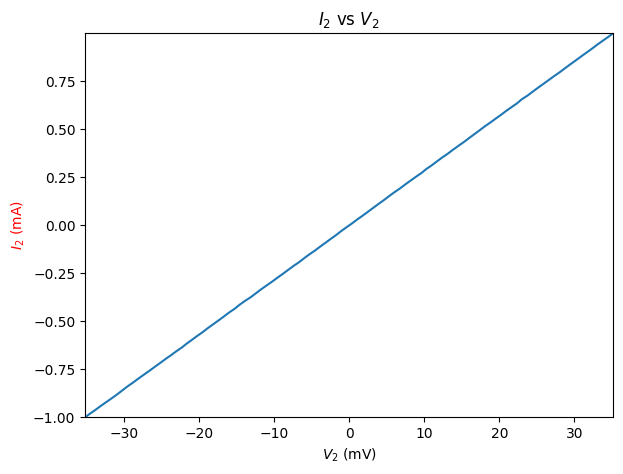

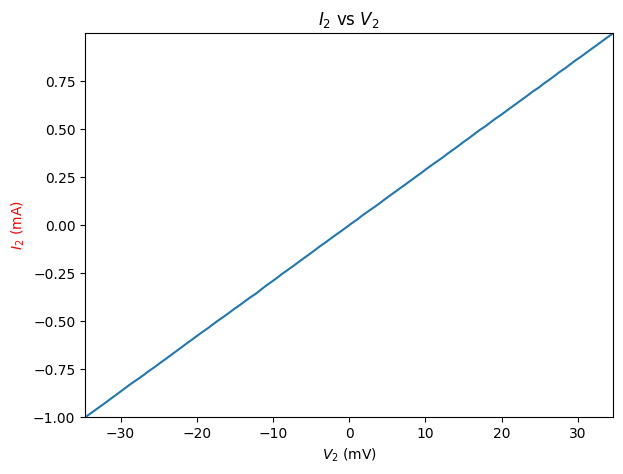

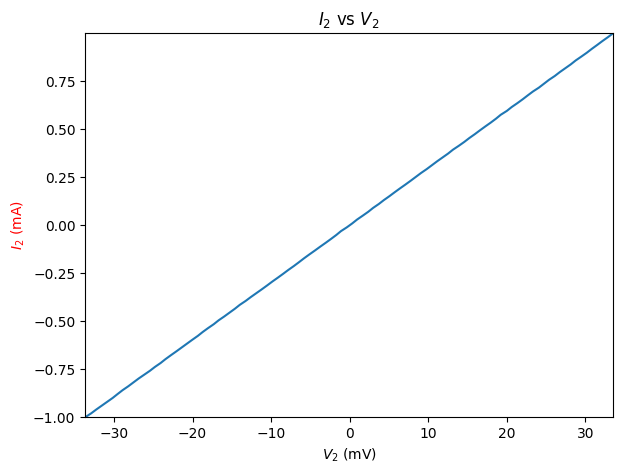

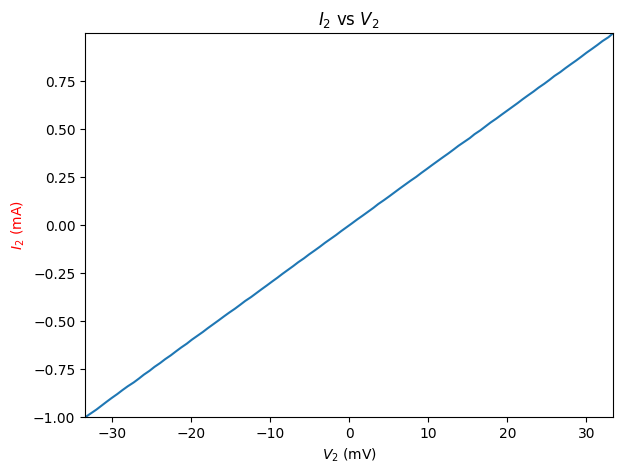

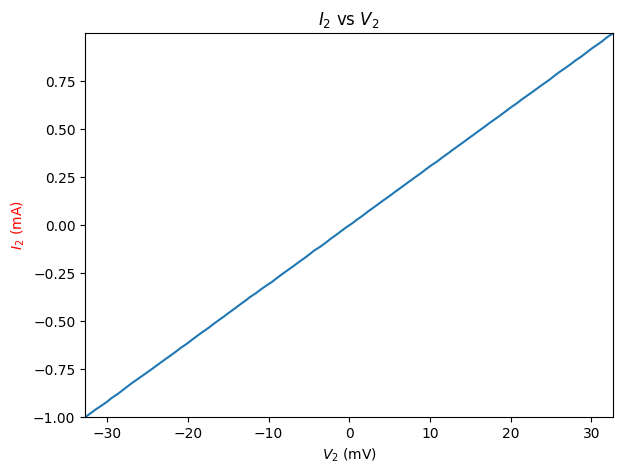

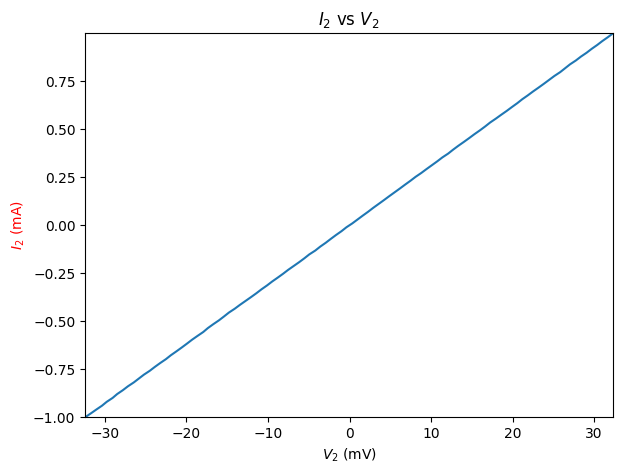

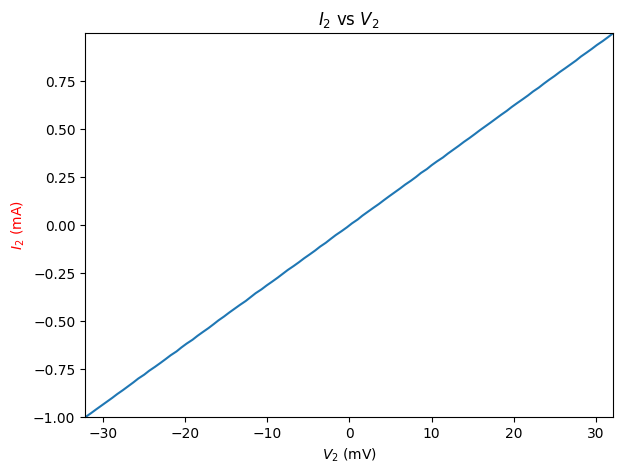

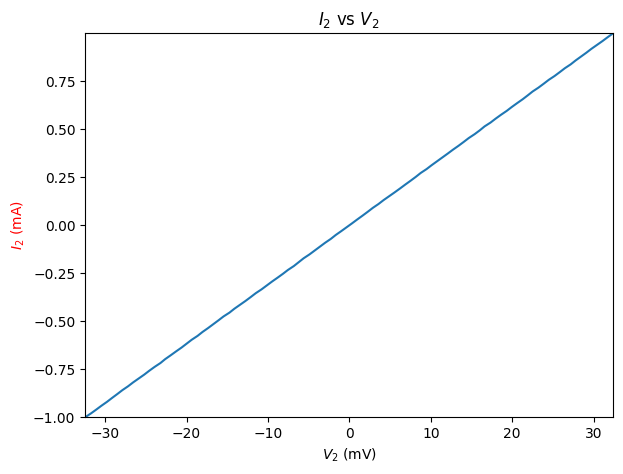

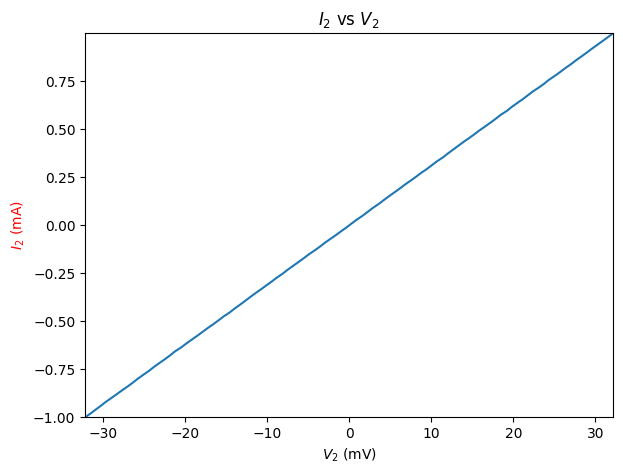

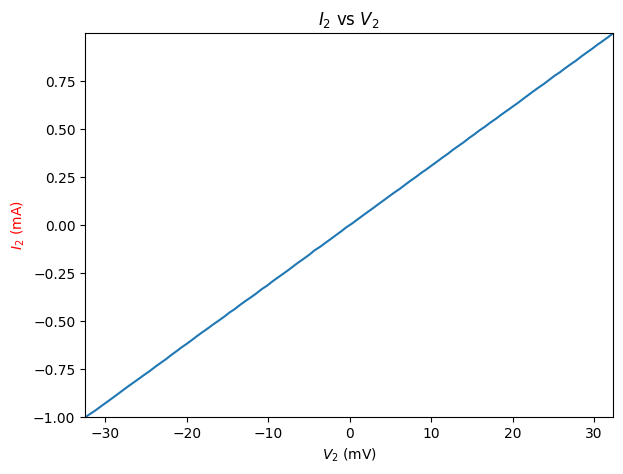

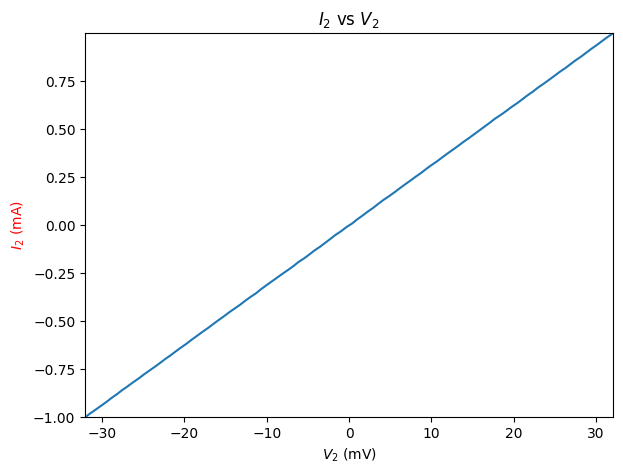

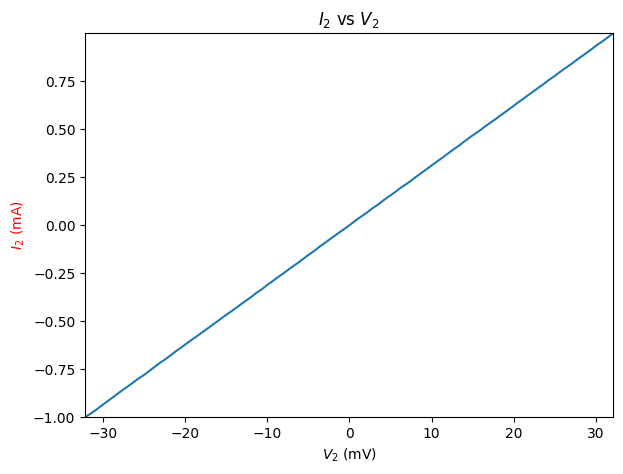

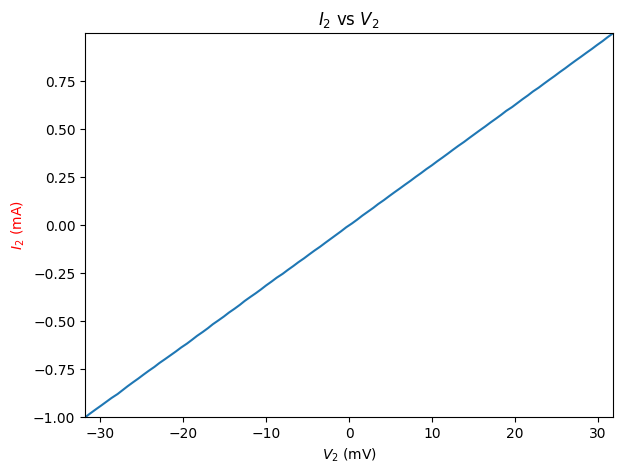

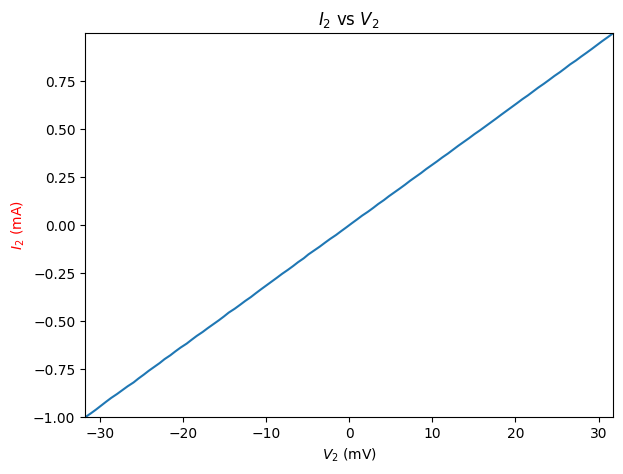

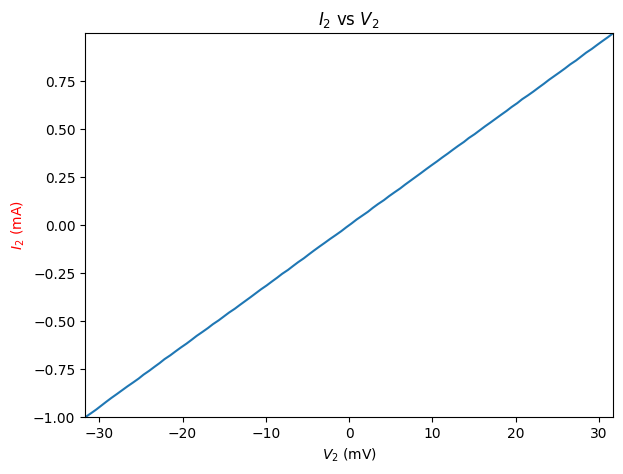

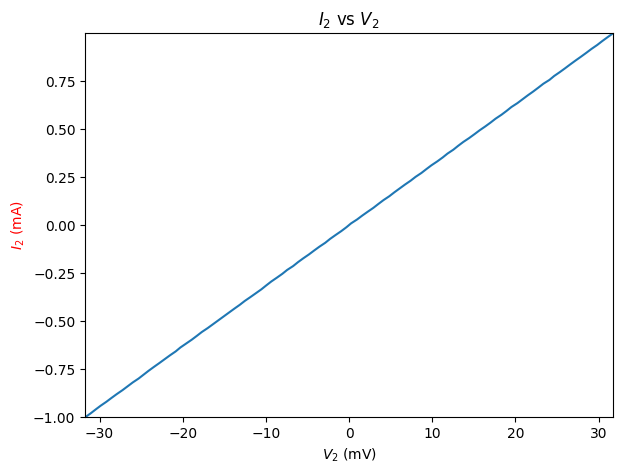

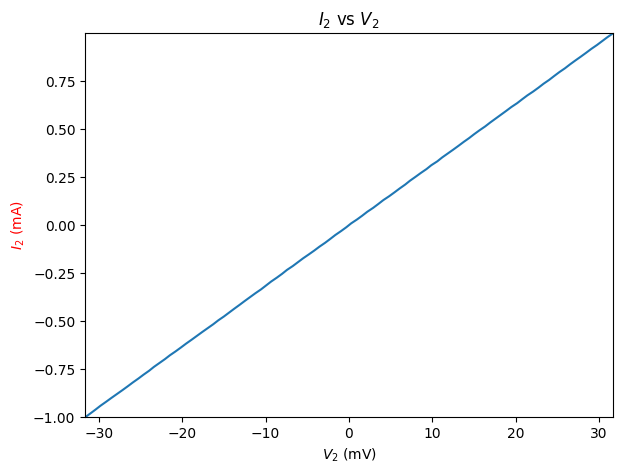

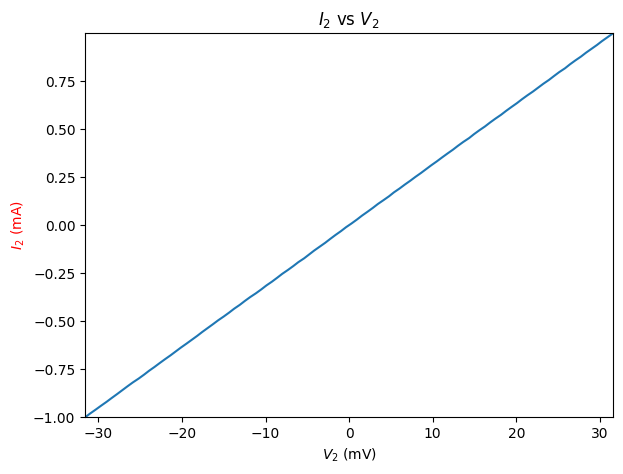

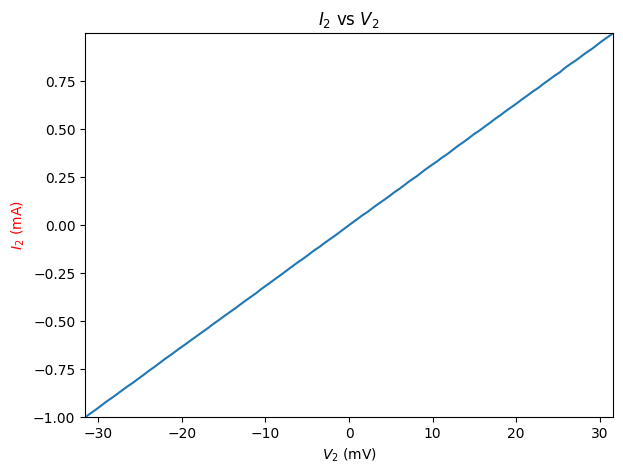

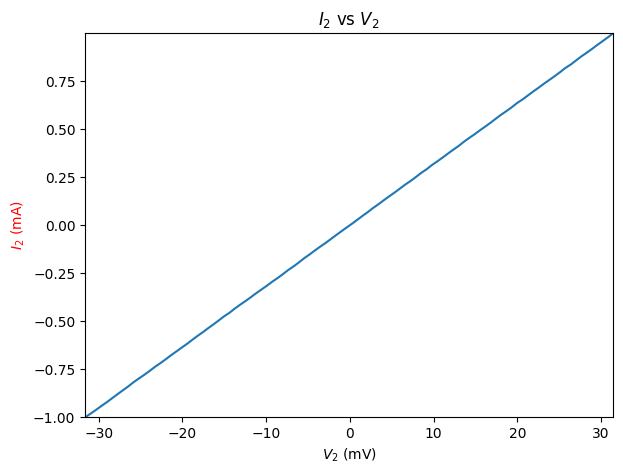

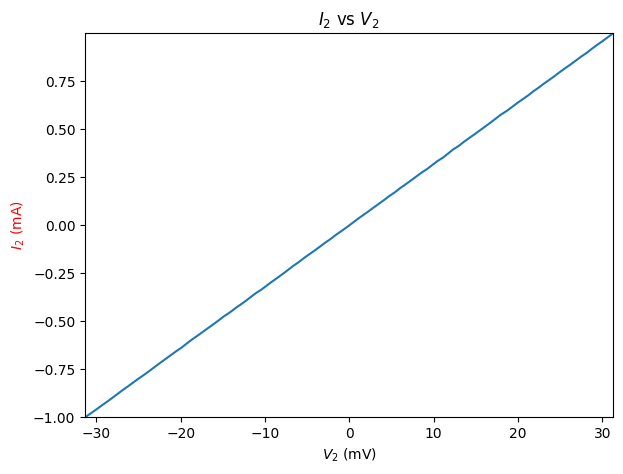

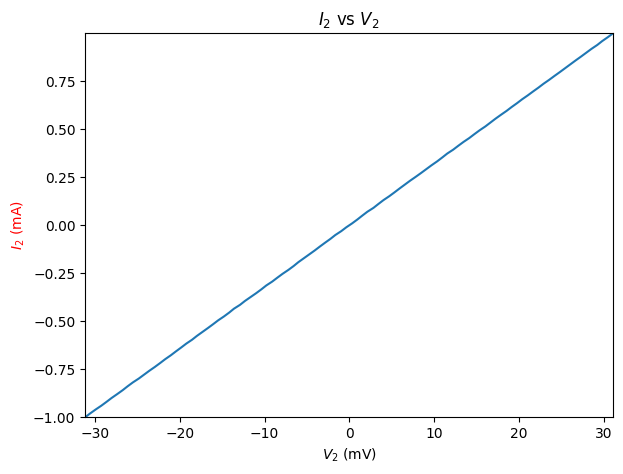

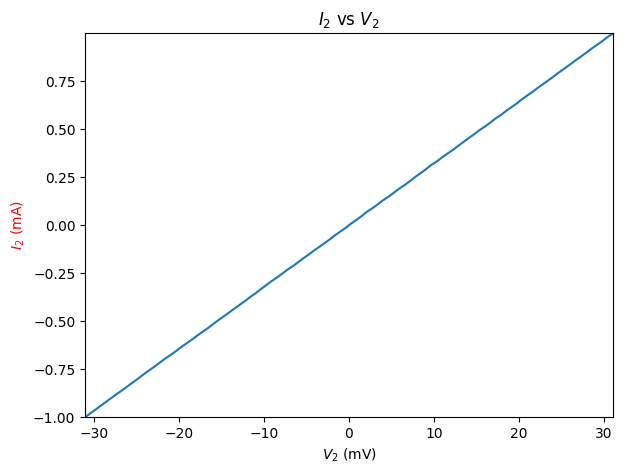

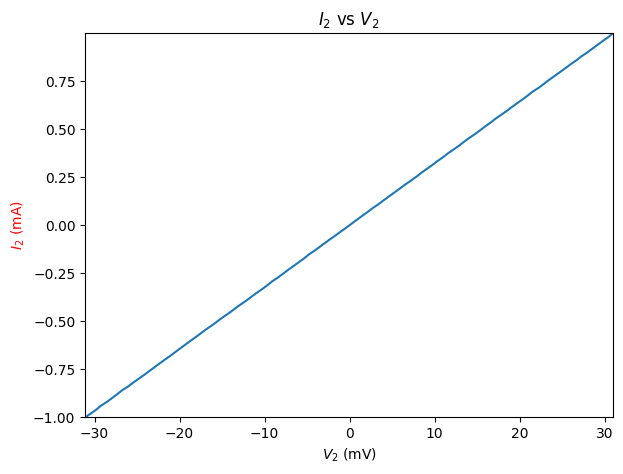

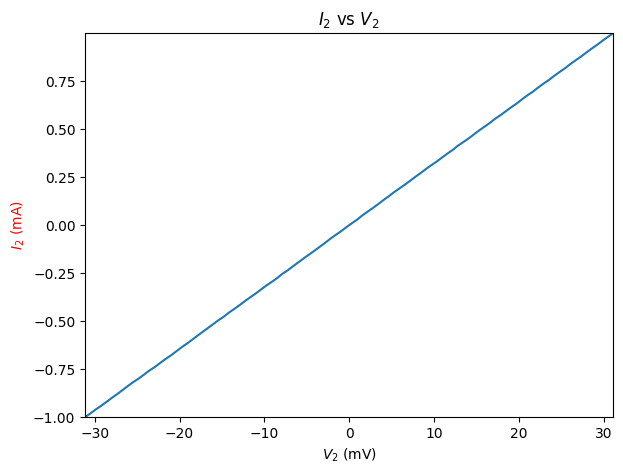

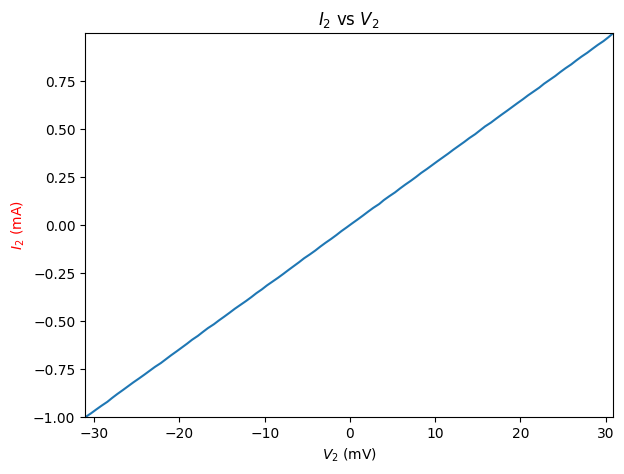

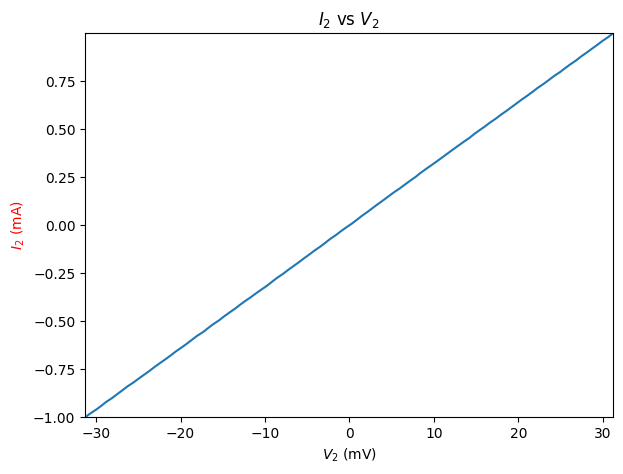

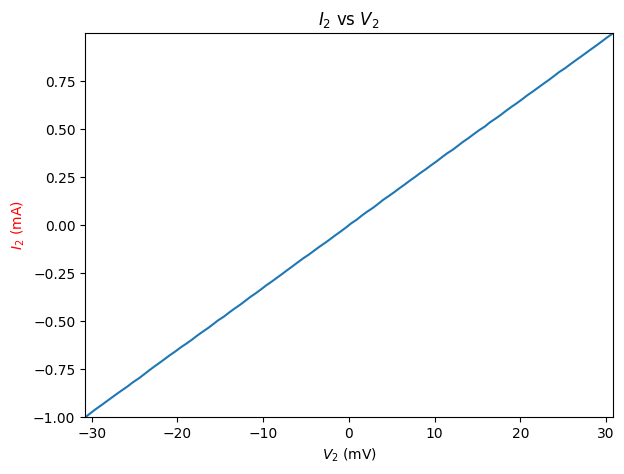

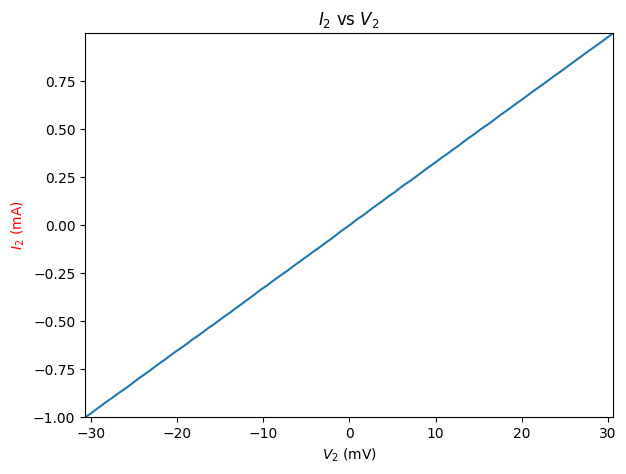

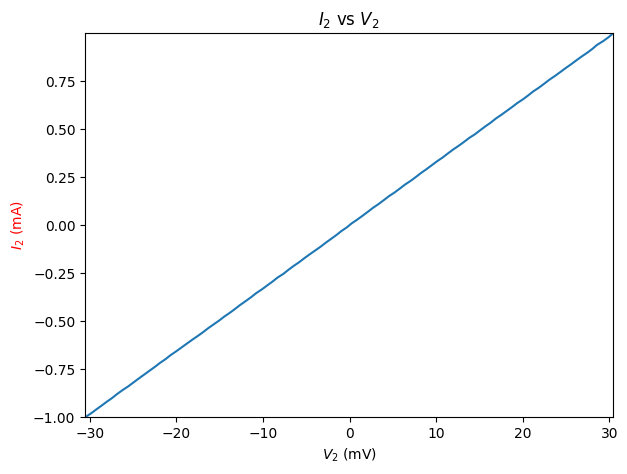

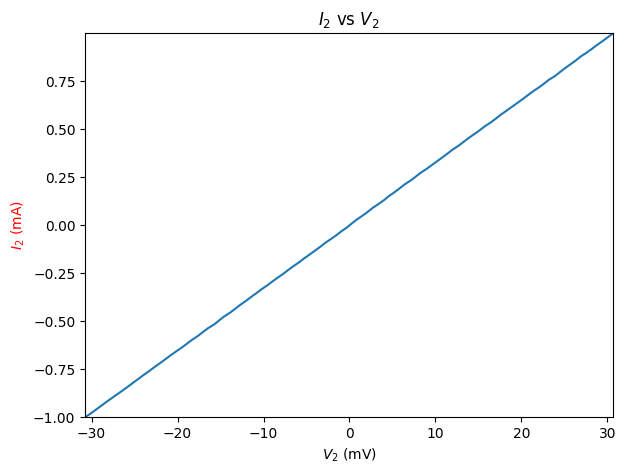

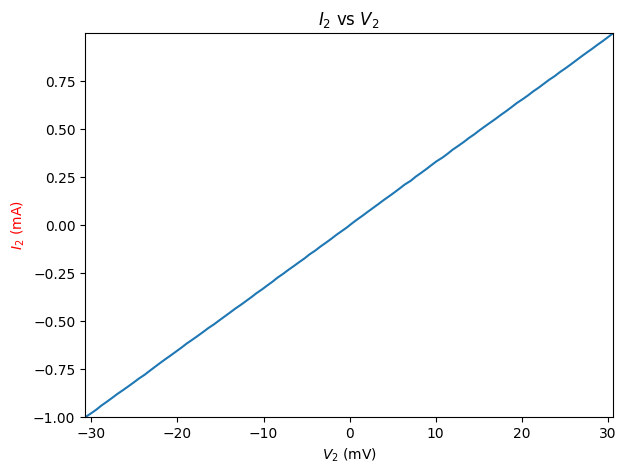

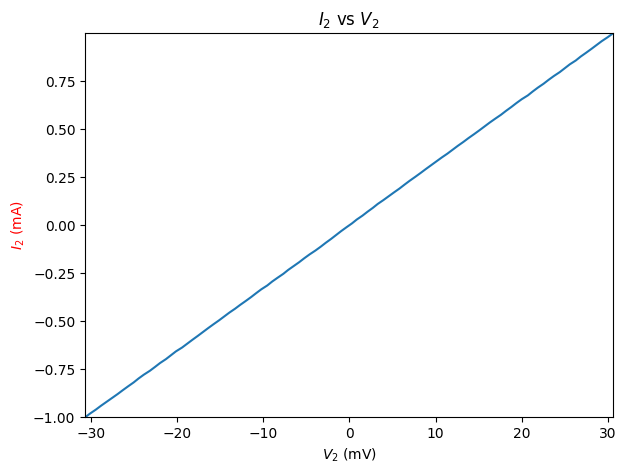

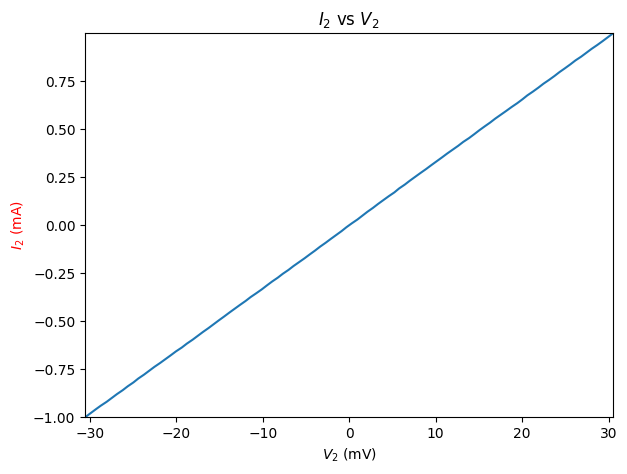

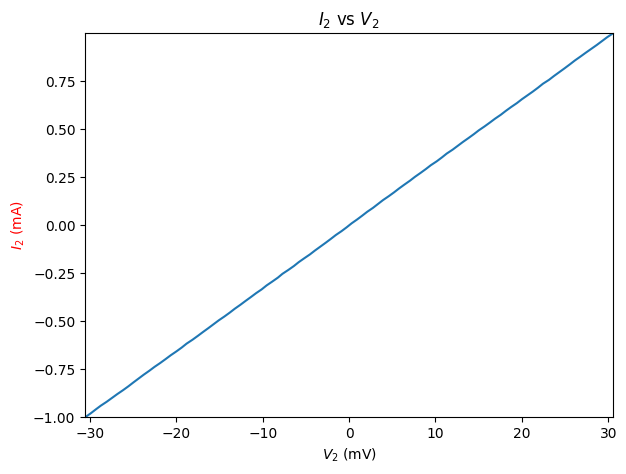

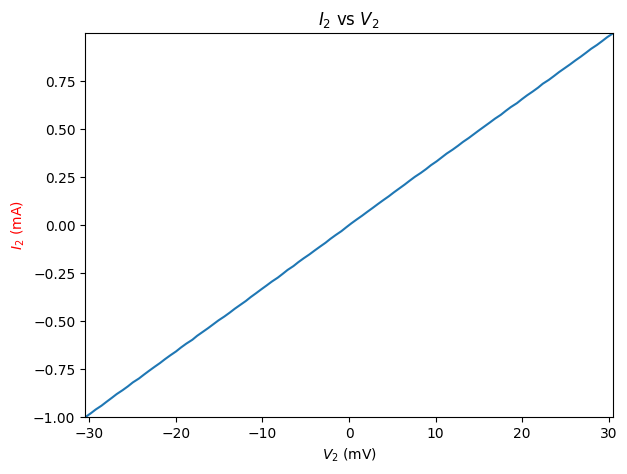

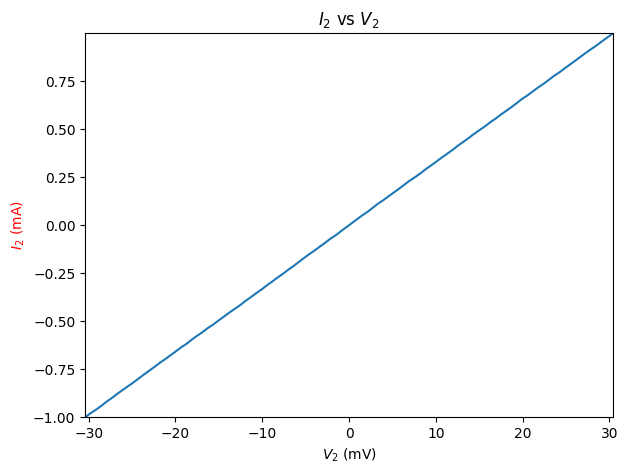

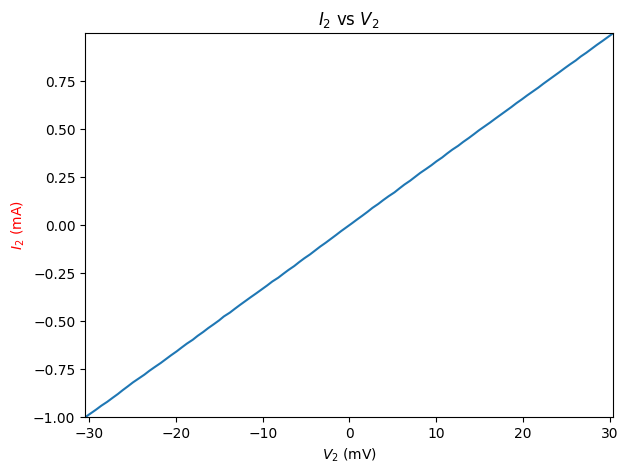

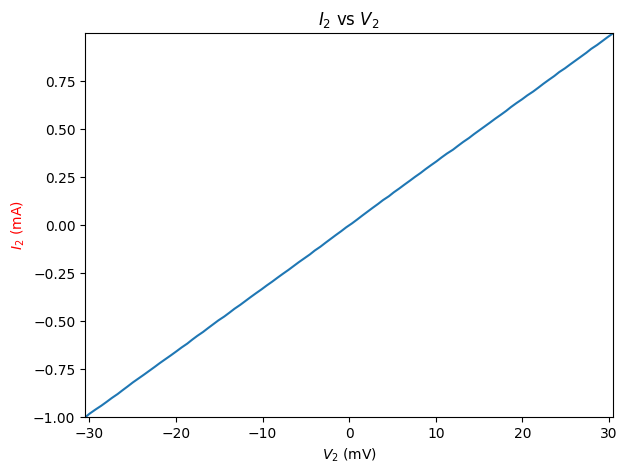

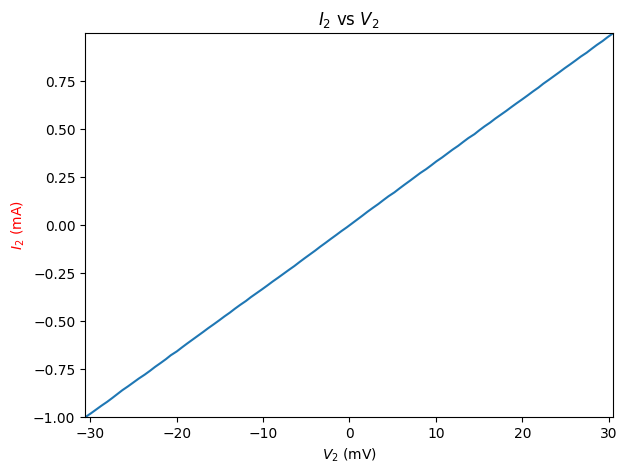

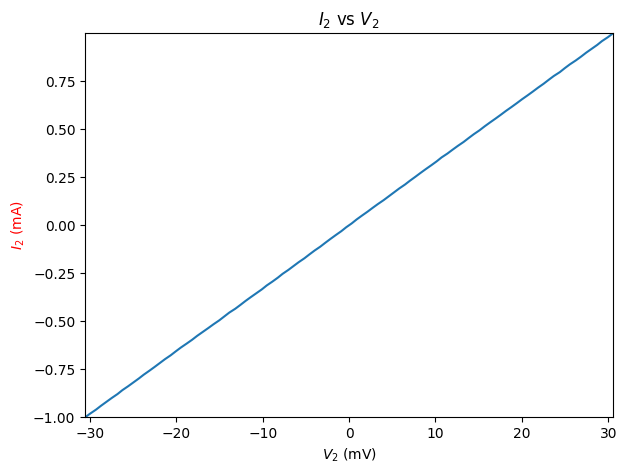

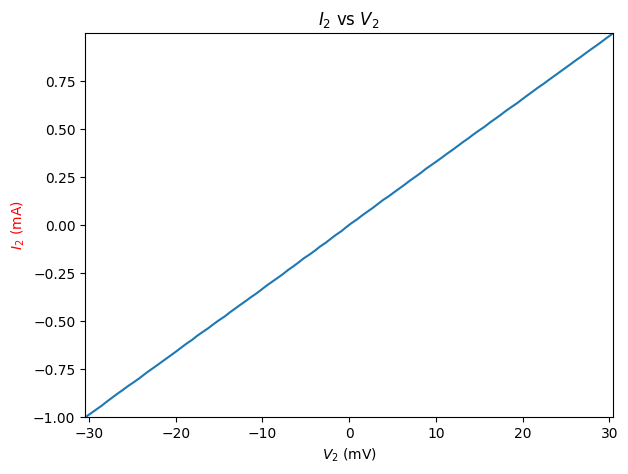

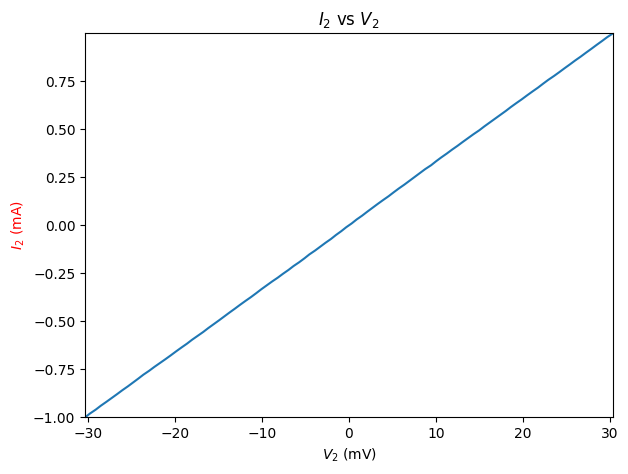

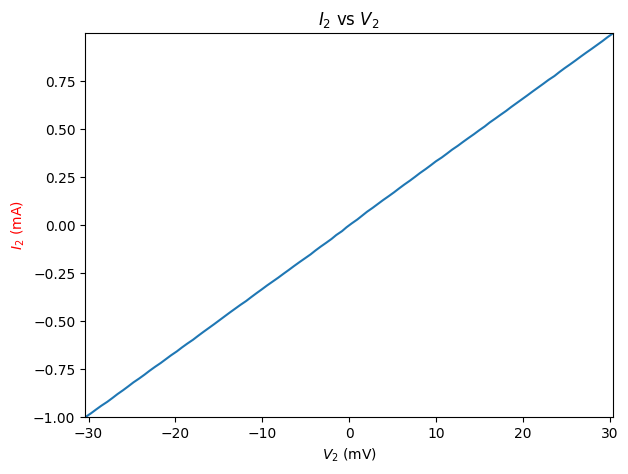

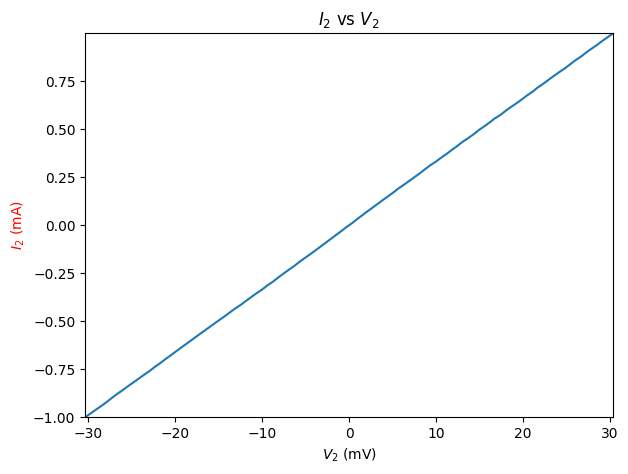

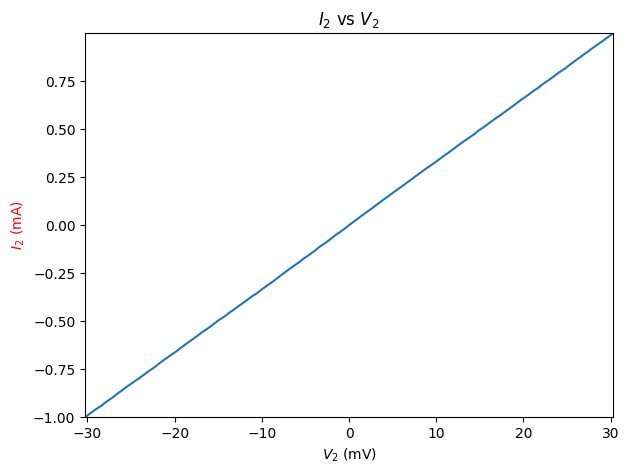

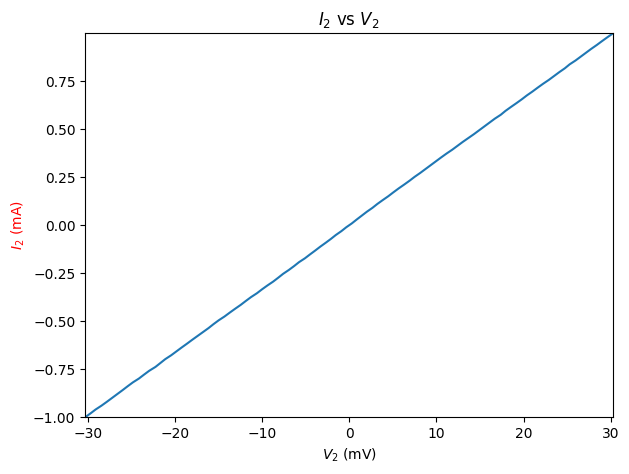

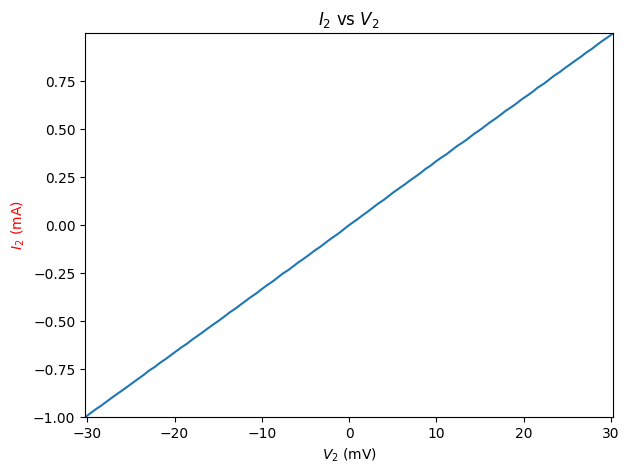

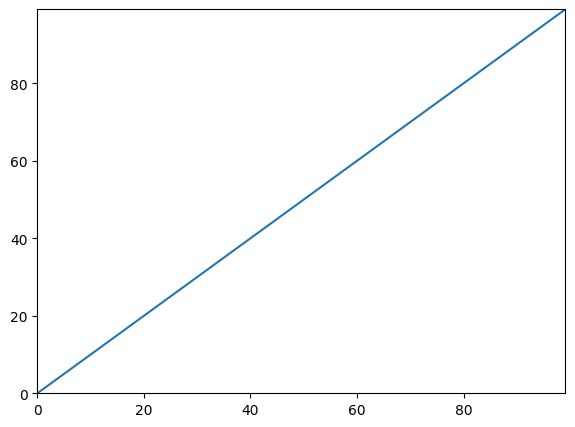

In [4]:
for i in range(128):
    clear_output(wait=True)

    start=['+']+['_' for x in range(29)]
    prog_bar=display('',display_id=True)
    
    for j in range(3600):
        if datetime.datetime.now().time().minute%10 == 2: break        
        if j%30==0:
            progress=start[:]
        progress[j%30]='+'
        
        prog_bar.update(datetime.datetime.now().strftime("%H:%M")+' '+''.join(progress))
        sleep(1)

    print(f"Measurement: {i+1}")
    start=datetime.datetime.now().strftime("%y%m%d %H-%M")
    
    for n, Chn in enumerate(ChnSelect):
        clear_output(wait=True)
        print(f"Chn{n+1} measure: {Chn}")
        if Chn:
            printf(f"Measuring {ChnPrefix[n]}, ptype: {ptype[n]}       {datetime.datetime.now().strftime('%y/%m/%d %H:%M:%S')}", start, True)
            INO.opench(n+1)
            loop(HP, ChnPrefix[n], ptype[n], start)
            printf('', start, True)

    INO.opench(6)
    path=f'C:/Users/Zucchi/Documents/Medidas/Rampup/{start}/short.csv'
    clear_output(wait=True)
    printf(f"Measuring short \n", start, True)
    now=datetime.datetime.now().strftime("%H%M")
    printf(f"{now} : Parameters short\n (-1e-3, 1e-3, 100 points)\n", start)
    HP.Set2P(-1e-3, 1e-3, 100)
    HP.Var2Name=None
    HP.Var2=None
    HP.SetIntTime("SHOR")
    HP.SingleSave(path)
    R=Plot2P(path)
    printf(f"R={format(R, '.2f')} ohm\n", start, True)